# Credit Scoring_Achyar

################################################################################################################################

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, Imputer, MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Import Data

In [2]:
train=pd.read_csv('npl_train.csv') #catatan pakai encoding bila perlu, alternaitv delimeter=',' jika butuh
test=pd.read_csv('npl_test.csv') #kalau tidak ada header dan naik satu baris, tambahkan header=None

################################################################################################################################

## View, Cleansing , EDA

### + View

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
#Jumlah baris dan kolom dari df
train.shape

(15493, 24)

In [5]:
train.head()

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [6]:
train[train['sisa_tagihan_tidak_terbayar']>=train['tagihan']].shape

(7766, 24)

In [7]:
#menampilkan tipe dari semua variabel dari data frame
print(train.dtypes.to_string())

X                                        int64
jumlah_kartu                             int64
outstanding                              int64
limit_kredit                           float64
tagihan                                float64
total_pemakaian_tunai                  float64
total_pemakaian_retail                 float64
sisa_tagihan_tidak_terbayar            float64
kode_cabang                             object
rasio_pembayaran                       float64
persentasi_overlimit                   float64
rasio_pembayaran_3bulan                float64
rasio_pembayaran_6bulan                float64
skor_delikuensi                          int64
flag_kredit_macet                        int64
jumlah_tahun_sejak_pembukaan_kredit    float64
total_pemakaian                        float64
sisa_tagihan_per_jumlah_kartu          float64
sisa_tagihan_per_limit                 float64
total_pemakaian_per_limit              float64
pemakaian_3bln_per_limit               float64
pemakaian_6bl

In [8]:
train['flag_kredit_macet'].value_counts()

0    14134
1     1359
Name: flag_kredit_macet, dtype: int64

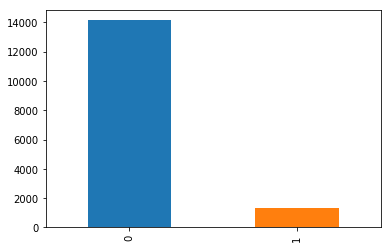

In [9]:
train['flag_kredit_macet'].value_counts().plot.bar()

Jumlah kredit lancar adalah 10 kali lipat jumlah kredit macet (kasus imbalance class)

## Jumlah kartu terhadap flag macet

In [15]:
train['jumlah_kartu'].value_counts()

2     10734
3      2795
4      1136
5       460
6       151
1        76
7        75
8        27
9        16
11        7
10        7
13        4
12        2
16        2
15        1
Name: jumlah_kartu, dtype: int64

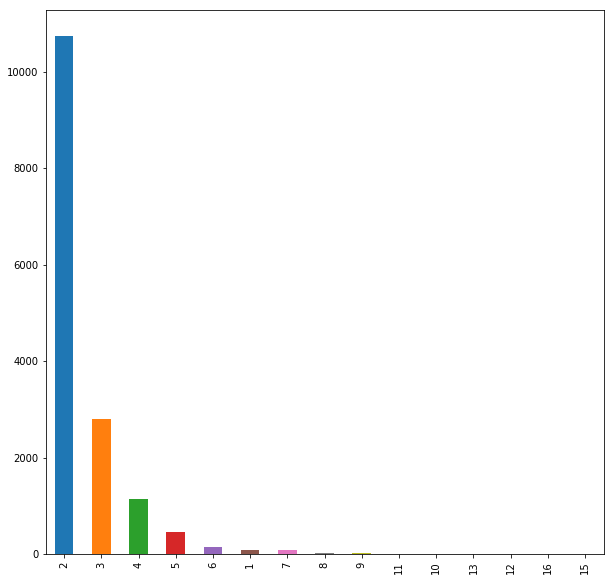

In [20]:
#Jumlah kartu terhadap flag macet
plt.figure(figsize=(10,10))
train['jumlah_kartu'].value_counts().plot.bar()

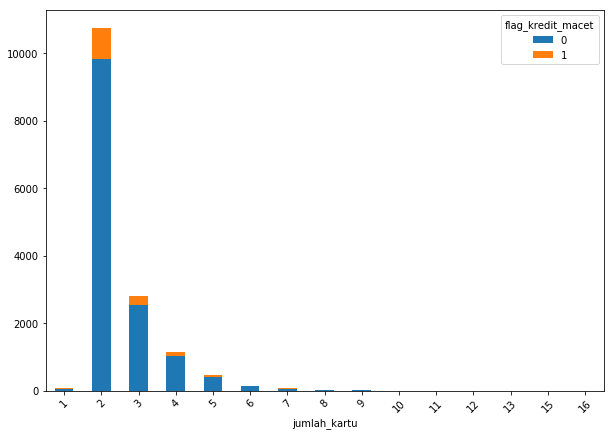

In [67]:
pd.crosstab(train['jumlah_kartu'],train['flag_kredit_macet']).plot.bar(rot=45,stacked=True, figsize=(10,7))

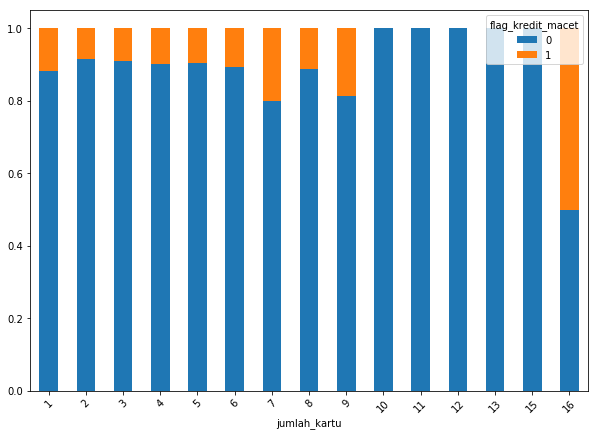

In [23]:
pd.crosstab(train['jumlah_kartu'],train['flag_kredit_macet'],normalize='index').plot.bar(rot=45,stacked=True, figsize=(10,7))

## Outstanding terhadap flag macet

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


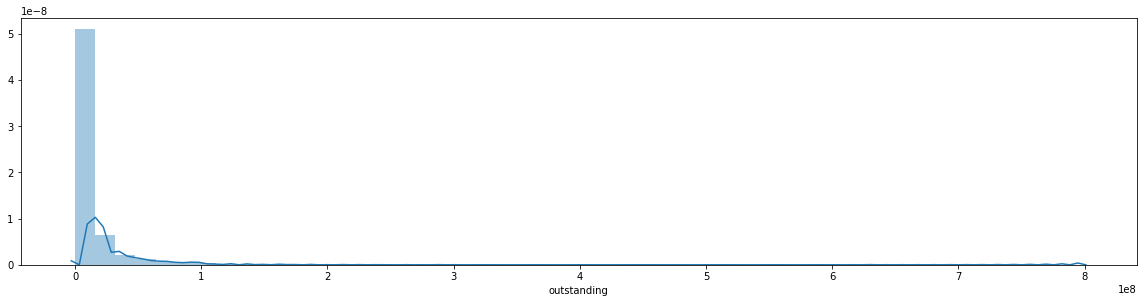

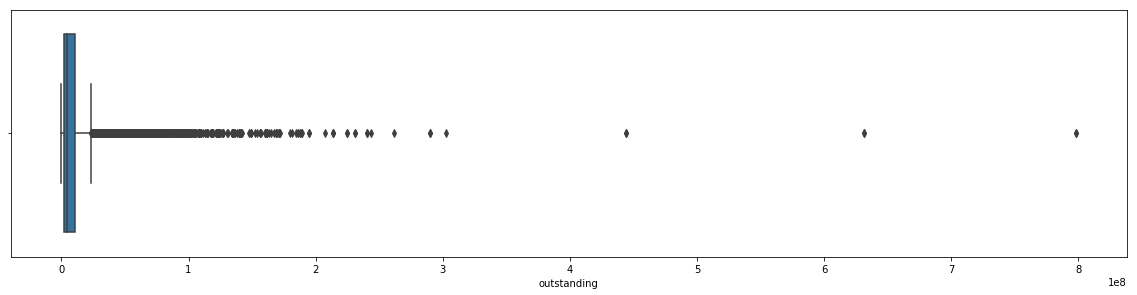

In [43]:
plt.figure(figsize=(20,10))
plt.subplot(211)   
sns.distplot(train['outstanding'], bins=None, hist=True, kde=True)

plt.figure(figsize=(20,10))
plt.subplot(212)   
sns.boxplot(train['outstanding'])

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: outstanding, dtype: object

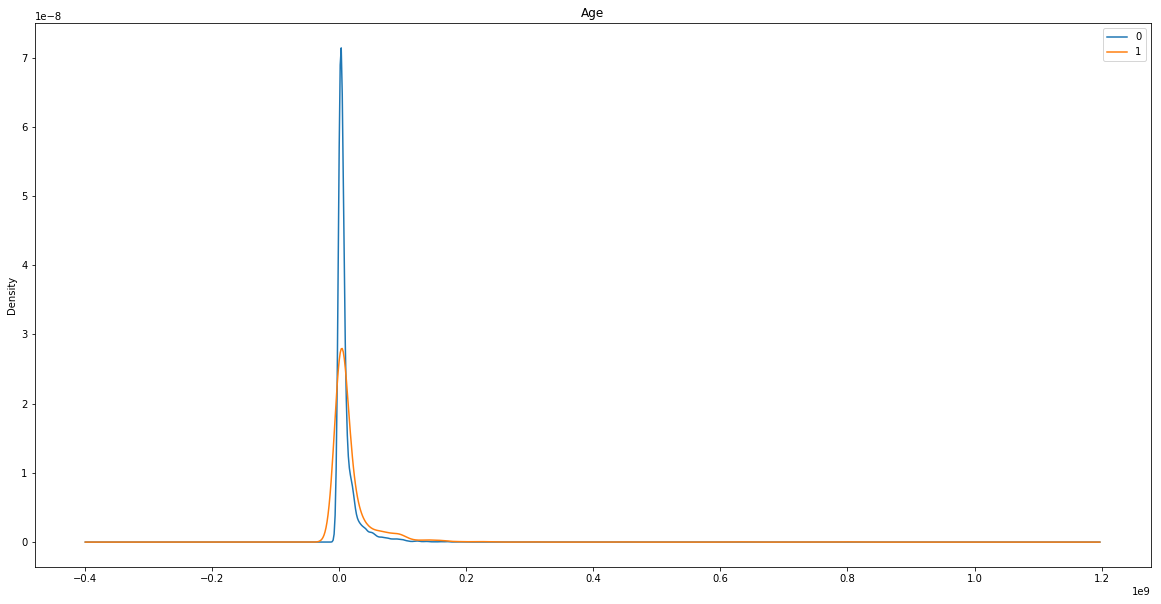

In [44]:
plt.figure(figsize=(20,10))
train.groupby('flag_kredit_macet').outstanding.plot.density(title='Age',legend=True)

## Limit kredit terhadap flag macet`

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


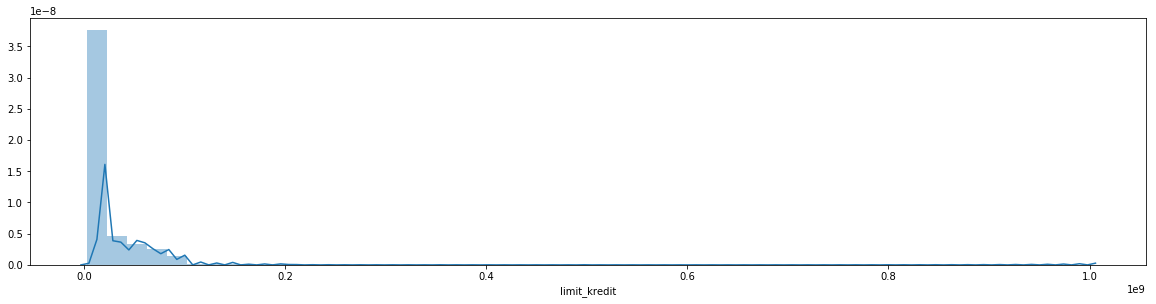

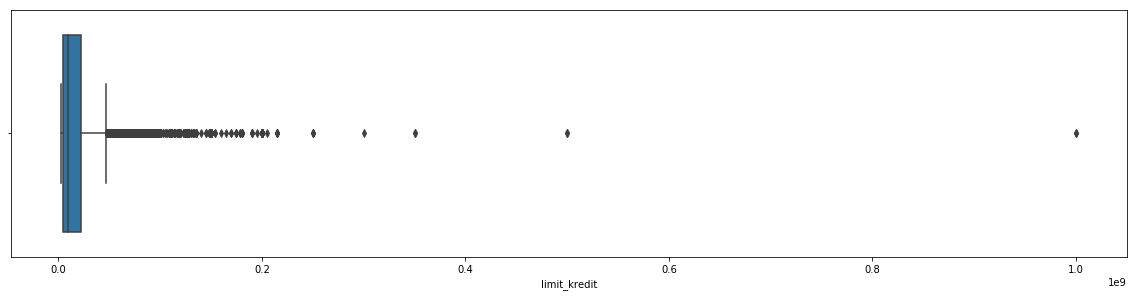

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(211)   
sns.distplot(train['limit_kredit'], bins=None, hist=True, kde=True)

plt.figure(figsize=(20,10))
plt.subplot(212)   
sns.boxplot(train['limit_kredit'])

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: limit_kredit, dtype: object

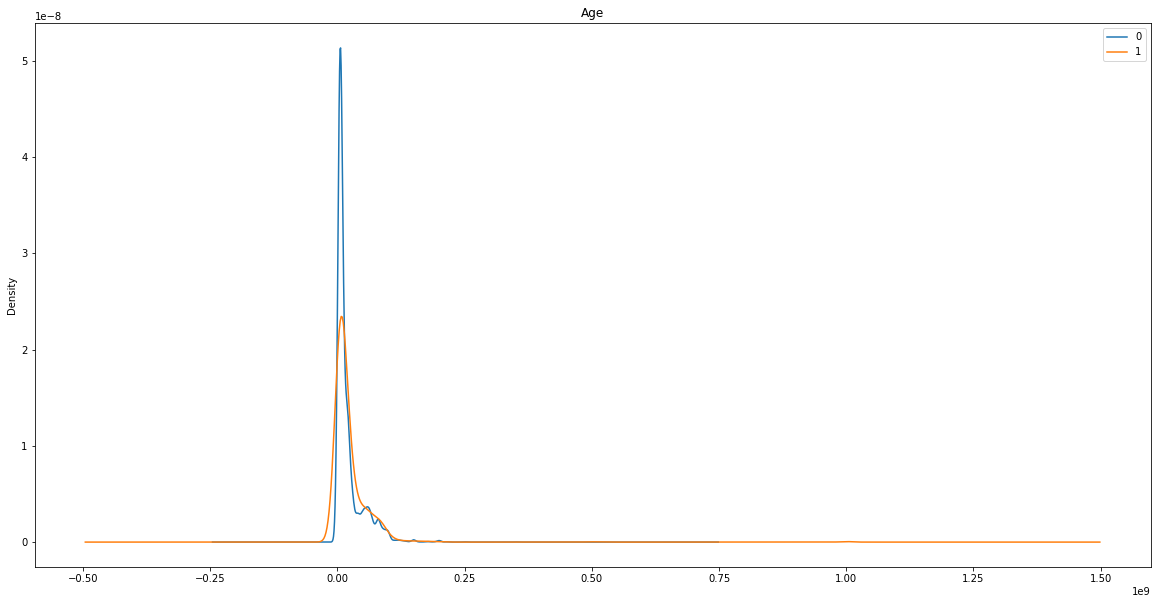

In [42]:
plt.figure(figsize=(20,10))
train.groupby('flag_kredit_macet').limit_kredit.plot.density(title='Age',legend=True)

## Tagihan terhadap flag macet

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


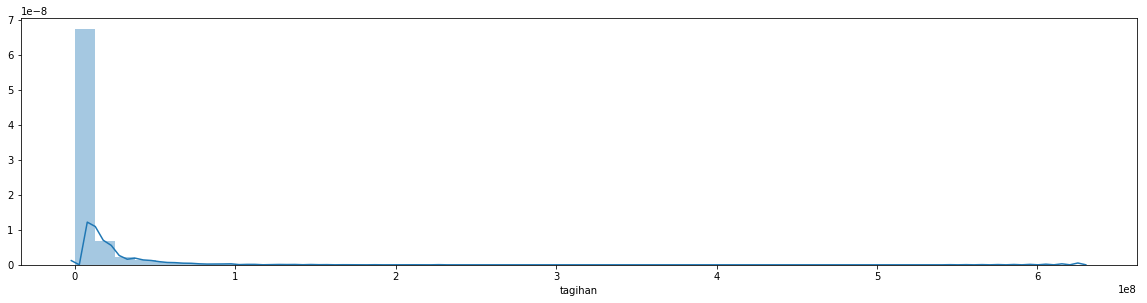

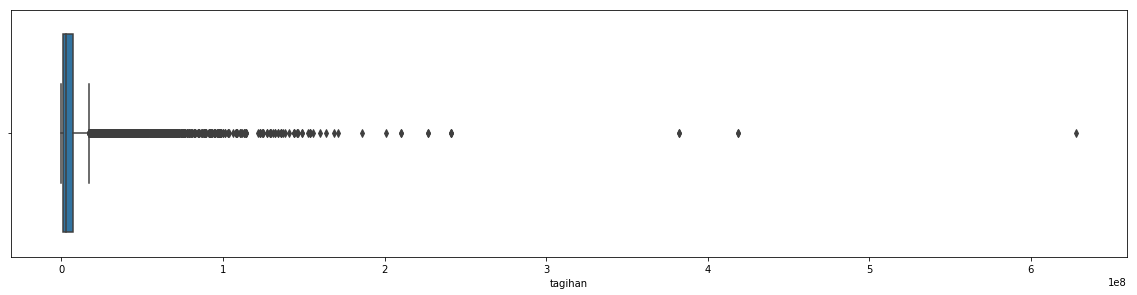

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(211)   
sns.distplot(train['tagihan'], bins=None, hist=True, kde=True)

plt.figure(figsize=(20,10))
plt.subplot(212)   
sns.boxplot(train['tagihan'])

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tagihan, dtype: object

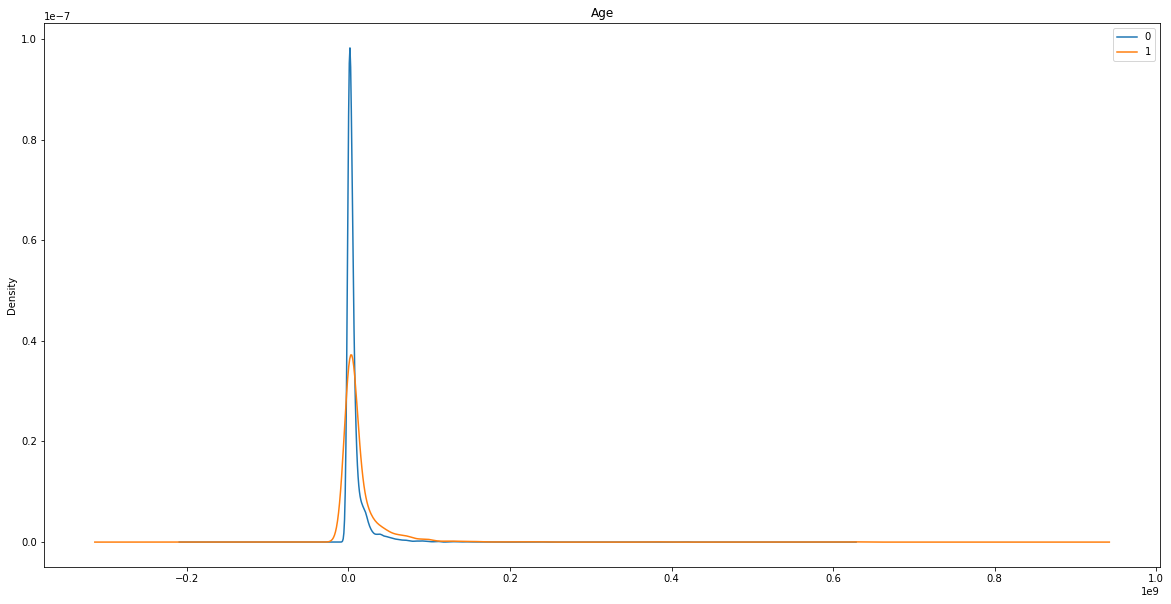

In [46]:
plt.figure(figsize=(20,10))
train.groupby('flag_kredit_macet').tagihan.plot.density(title='Age',legend=True)

## Total Pemakaian Tunai terhadap flag macet

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


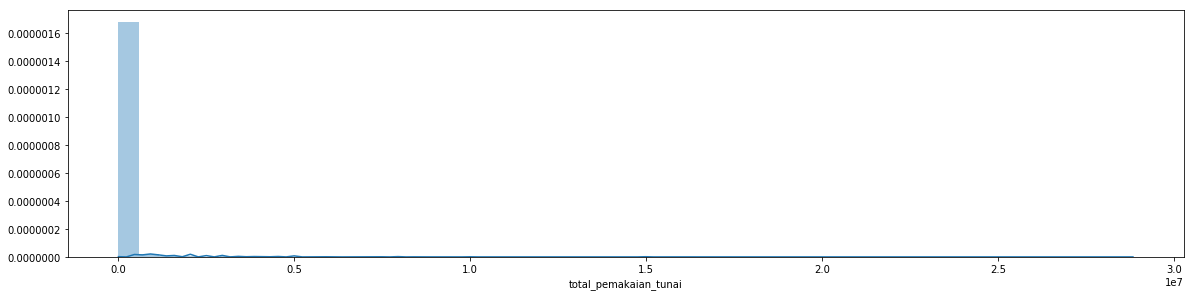

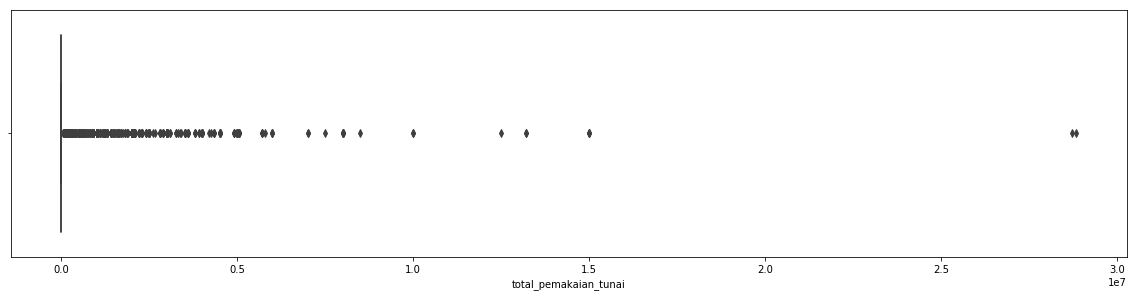

In [48]:
plt.figure(figsize=(20,10))
plt.subplot(211)   
sns.distplot(train['total_pemakaian_tunai'], bins=None, hist=True, kde=True)

plt.figure(figsize=(20,10))
plt.subplot(212)   
sns.boxplot(train['total_pemakaian_tunai'])

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_pemakaian_tunai, dtype: object

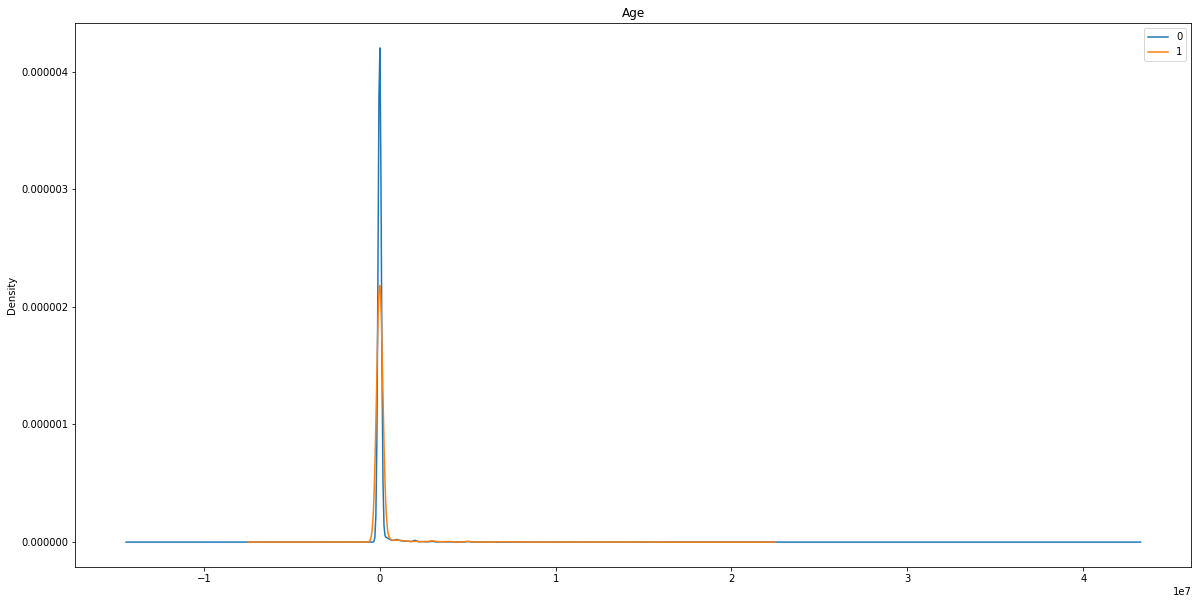

In [50]:
plt.figure(figsize=(20,10))
train.groupby('flag_kredit_macet').total_pemakaian_tunai.plot.density(title='Age',legend=True)

## Total Pemakaian Retail terhadap flag macet

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


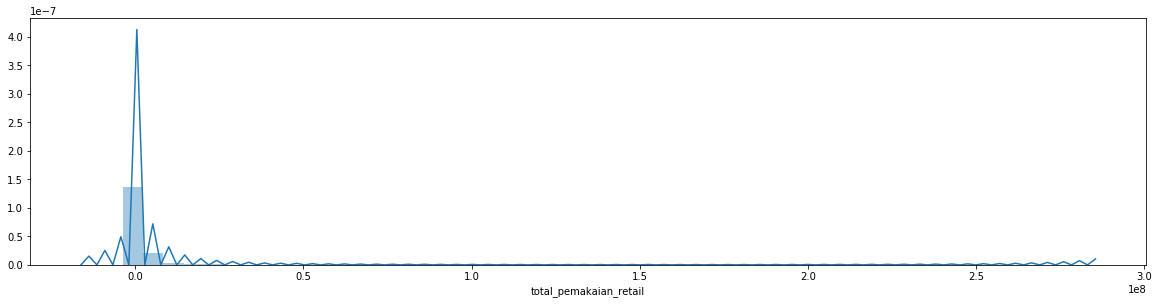

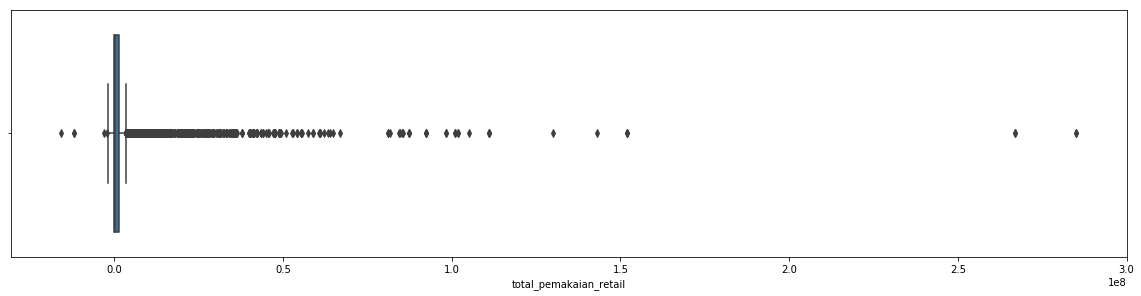

In [51]:
plt.figure(figsize=(20,10))
plt.subplot(211)   
sns.distplot(train['total_pemakaian_retail'], bins=None, hist=True, kde=True)

plt.figure(figsize=(20,10))
plt.subplot(212)   
sns.boxplot(train['total_pemakaian_retail'])

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_pemakaian_retail, dtype: object

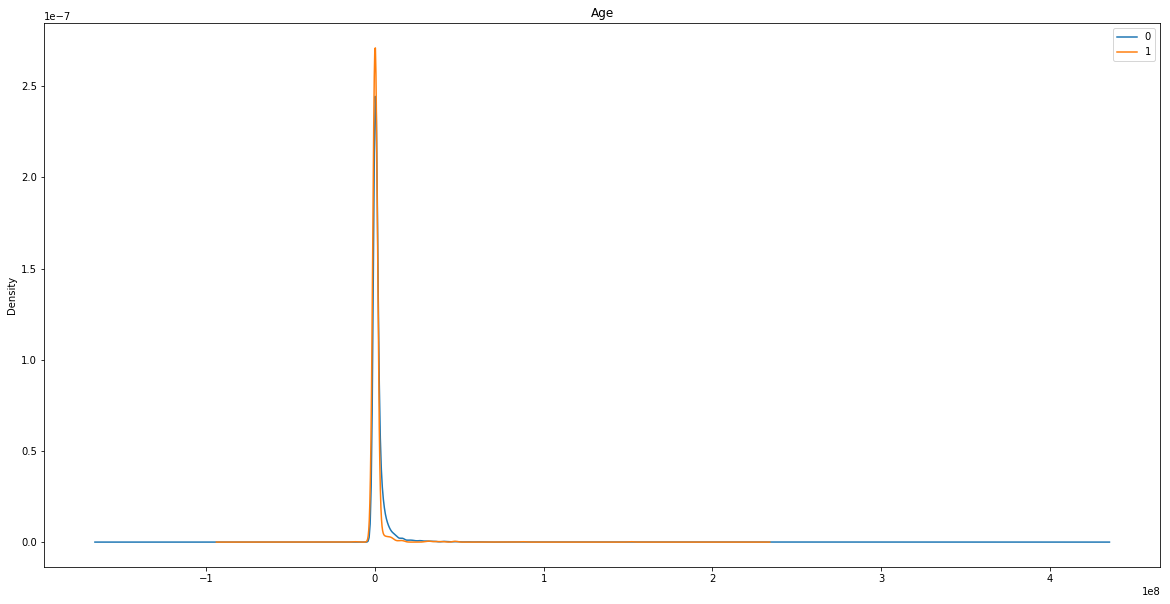

In [53]:
plt.figure(figsize=(20,10))
train.groupby('flag_kredit_macet').total_pemakaian_retail.plot.density(title='Age',legend=True)

## Sisa Tagihan tidak terbayar terhadap flag macet

C:\Users\achyar059232\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


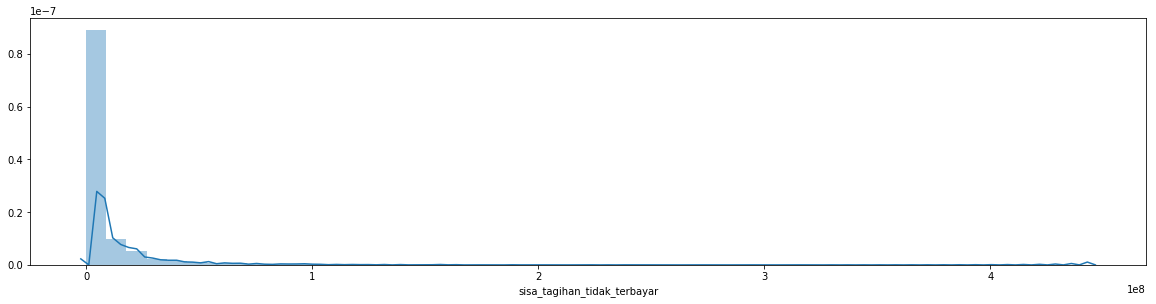

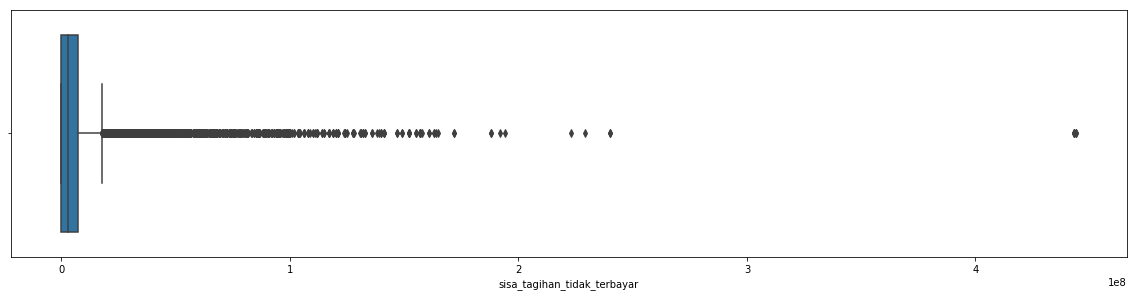

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(211)   
sns.distplot(train['sisa_tagihan_tidak_terbayar'], bins=None, hist=True, kde=True)

plt.figure(figsize=(20,10))
plt.subplot(212)   
sns.boxplot(train['sisa_tagihan_tidak_terbayar'])

flag_kredit_macet
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sisa_tagihan_tidak_terbayar, dtype: object

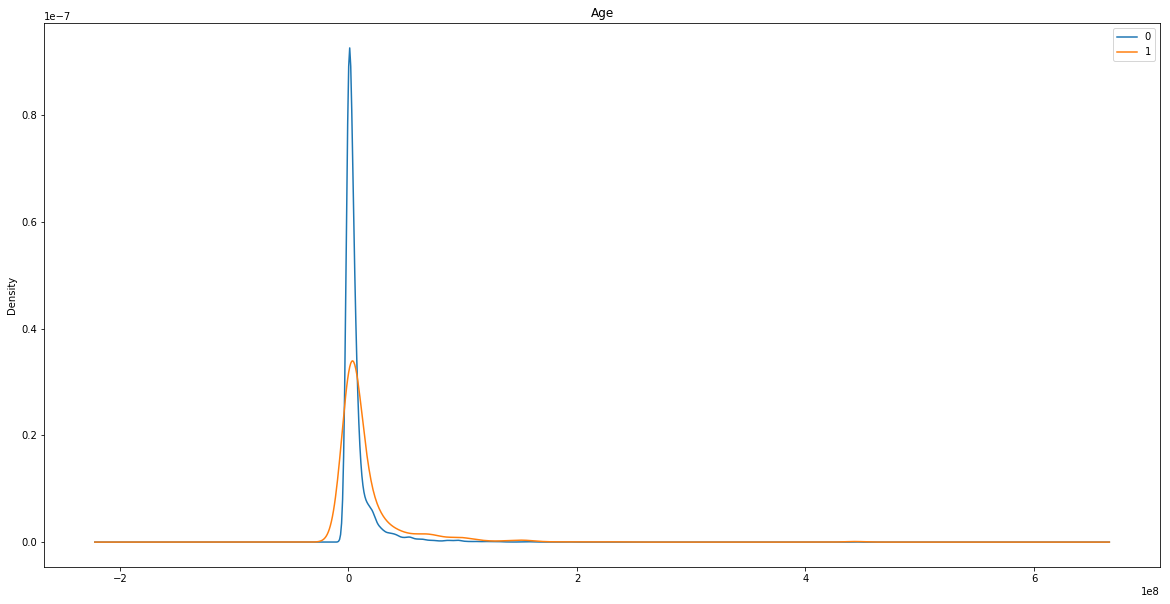

In [58]:
plt.figure(figsize=(20,10))
train.groupby('flag_kredit_macet').sisa_tagihan_tidak_terbayar.plot.density(title='Age',legend=True)

## Kode Cabang

In [60]:
#Jumlah kartu terhadap flag macet
plt.figure(figsize=(10,10))
train['kode_cabang'].value_counts()

A    8705
F    1697
B    1351
I     991
E     592
G     566
J     410
H     367
C     334
D     205
K     175
Name: kode_cabang, dtype: int64

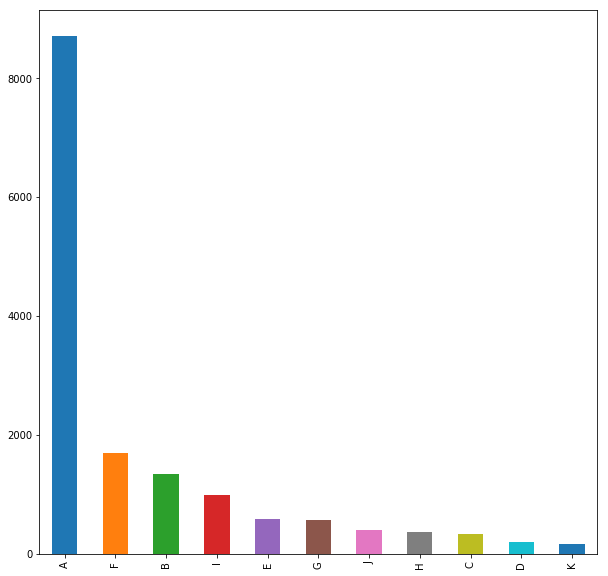

In [59]:
#Jumlah kartu terhadap flag macet
plt.figure(figsize=(10,10))
train['kode_cabang'].value_counts().plot.bar()

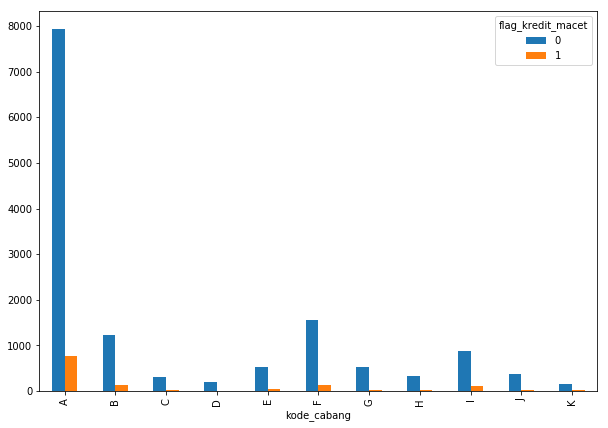

In [65]:
pd.crosstab(train['kode_cabang'],train['flag_kredit_macet']).plot.bar(stacked=False, figsize=(10,7))

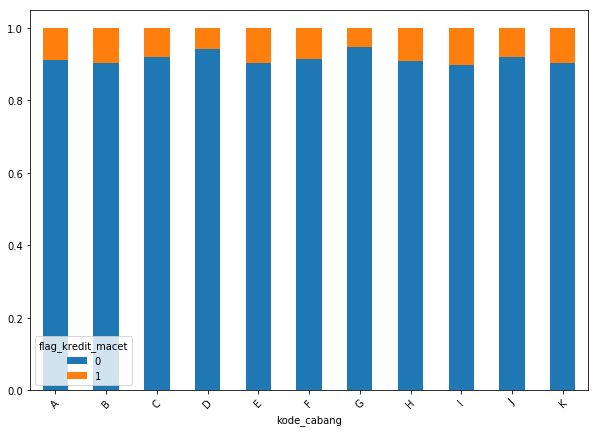

In [66]:
pd.crosstab(train['kode_cabang'],train['flag_kredit_macet'],normalize='index').plot.bar(rot=45,stacked=True, figsize=(10,7))